<a href="https://colab.research.google.com/github/Leehaon/Data-Analysis/blob/main/20250323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 성별에 따른 직업 빈도 - 성별에 따라 어떤 직업이 가장 많을까?

In [259]:
!pip install pyreadstat

In [260]:
!pip install koreanize-matplotlib

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [262]:
# 데이터 로드
welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

welfare = welfare.rename(columns = {'h14_g3' : 's',
                                    'h14_g11' : 'religion',
                                    'h14_g10' : 'marriage_type',
                                    'h14_eco9' : 'code_job'})

# 사용할 변수 검토 / 전처리
welfare['s'].value_counts()

,count
s,
2.0,7913
1.0,6505


In [263]:
welfare['s'] = np.where(welfare['s'] == 1, 'male', 'female')

# 직업
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
welfare = welfare.merge(list_job, how='left', on='code_job')

In [264]:
### 성별 직업 빈도

# 남성 직업 빈도 상위 10개
job_male = welfare.dropna(subset = ['job']) \
.query('s == "male"') \
.groupby('job', as_index=False) \
.agg(n = ('job', 'count')) \
.sort_values('n', ascending = False) \
.head(10)

job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [265]:
### 성별 직업 빈도

# 여성 직업 빈도 상위 10개
job_female = welfare.dropna(subset = ['job']) \
.query('s == "female"') \
.groupby('job', as_index=False) \
.agg(n = ('job', 'count')) \
.sort_values('n', ascending = False) \
.head(10)

job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

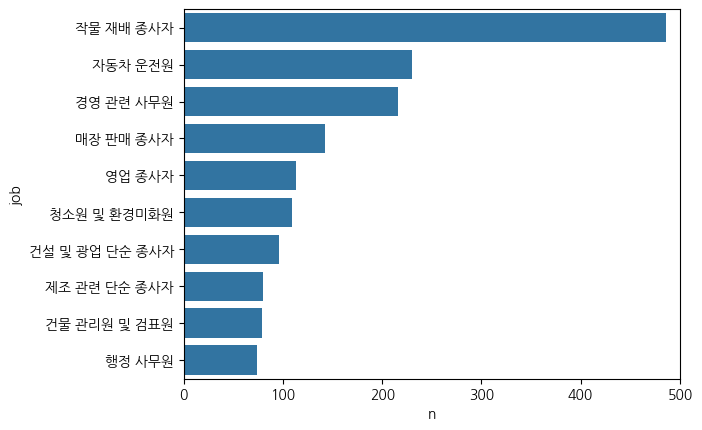

In [266]:
# 그래프 생성
sns.barplot(data=job_male, y='job', x='n').set(xlim = [0, 500])

[(0.0, 500.0)]

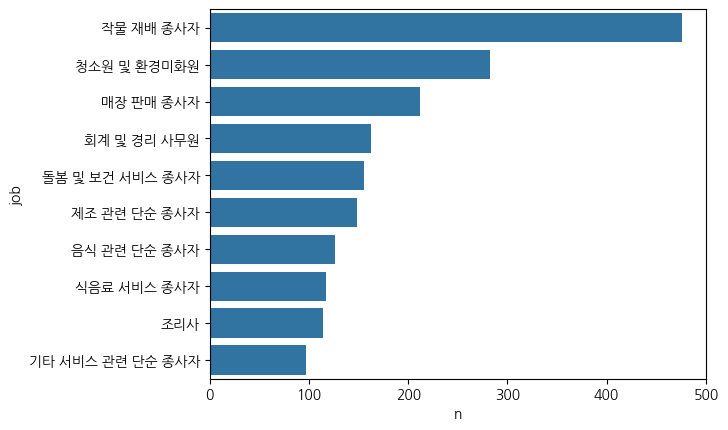

In [267]:
# 그래프 생성
sns.barplot(data=job_female, y='job', x='n').set(xlim = [0, 500])

종교 유무에 따른 이혼율 분석 - 종교가 있으면 이혼을 덜할까?

In [268]:
# 종교 변수
welfare['religion'].dtypes

dtype('float64')

In [269]:
welfare['religion'].value_counts()

,count
religion,
2.0,7815
1.0,6603


In [270]:
welfare['religion'] = np.where(welfare['religion'] == 1, 'Yes', "No")

In [271]:
# 혼인 유무 확인
welfare['marriage_type'].dtypes

dtype('float64')

In [272]:
welfare['marriage_type'].value_counts() # 이상치 없는걸 확인

,count
marriage_type,
1.0,7190
5.0,2357
0.0,2121
2.0,1954
3.0,689
4.0,78
6.0,29


In [273]:
# 이혼 여부 - 파생 변수 생성
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                               np.where(welfare['marriage_type'] == 3, 'divorce', 'etc'))

# 이혼 여부별 빈도
n_div = welfare.groupby('marriage', as_index=False) \
.agg(n=('marriage', 'count'))

n_div

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

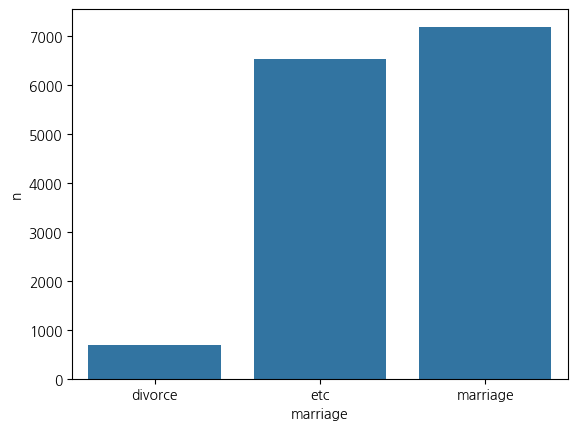

In [274]:
# 막대그래프
sns.barplot(data=n_div, x='marriage', y='n')

In [275]:
### 종교 유무에 따른 이혼율표 생성
rel_div = welfare.query('marriage != "etc"') \
.groupby('religion', as_index=False) \
['marriage'] \
.value_counts(normalize=True)

rel_div

,religion,marriage,proportion
0,No,marriage,0.905045
1,No,divorce,0.094955
2,Yes,marriage,0.920469
3,Yes,divorce,0.079531


In [276]:
# 백분율로 바꾸기
rel_div = rel_div.query('marriage == "divorce"') \
.assign(proportion = rel_div['proportion'] * 100) \
.round(1)

rel_div

,religion,marriage,proportion
1,No,divorce,9.5
3,Yes,divorce,8.0


<Axes: xlabel='religion', ylabel='proportion'>

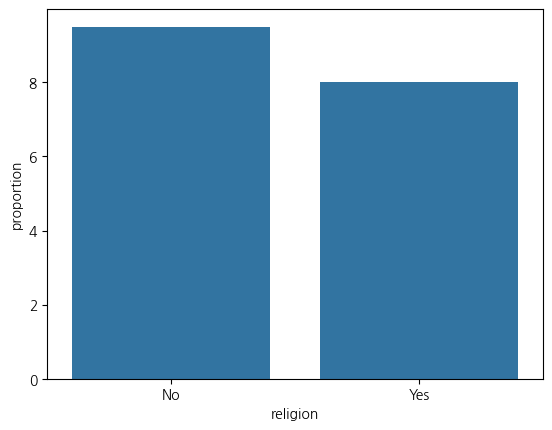

In [277]:
# 시각화
sns.barplot(data=rel_div, x='religion', y='proportion')

# 타이타닉 데이터 분석 예측

In [278]:
import pandas as pd

df = pd.read_csv('train.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.225,NaN,C
354,355,0,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.225,NaN,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.500,C106,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.000,NaN,S
791,792,0,2,"Gaskell, Mr. Alfred",male,16.0,0,0,239865,26.000,NaN,S
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.500,B50,C
658,659,0,2,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.000,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.500,NaN,S
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.650,NaN,S




*   객실 등급 : 객실 등급이 높을수록 생존율이 높았을 것으로 예상
*   성별 : 여성과 어린이의 생존율이 높았을 것으로 예상
*   나이 : 어린이와 노약자의 생존율 ?
*   동승자 : 가족이랑 함께 탑승을 했다면 생종율에 영향 ?
*   요금 : 높은 요금을 지불할수록 생존율이 높았을까?
*   탑승 항구 : 탑승했던 항구에 따라 생존율에 차이가 있을까?

# 데이터 전처리

In [279]:
### train.csv

In [280]:
# 1. 결측치 처리
train_df = pd.read_csv('train.csv')
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [281]:
# 'Age'열 결측치 처리 : 평균 나이로 대체
train_df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x:x.fillna(x.mean()))
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [282]:
# 'Cabin'열 결측치 처리 : 'Unknown'으로 대체
train_df['Cabin'].fillna('Unknown', inplace = True)
train_df.isnull().sum()

<ipython-input-282-52b8ba348997>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Cabin'].fillna('Unknown', inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [283]:
# 'Emcarked'열 결측치 처리 : 최빈값으로 대체
most = train_df['Embarked'].mode()[0]
# most
train_df['Embarked'].fillna(most, inplace = True)
train_df.isnull().sum()

<ipython-input-283-b3d74c538a9e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(most, inplace = True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# 범주형 변수 인코딩

- Sex : map() 함수를 사용해서 male = 0, female = 1로 인코딩 해준다.

- Embarked : OneHotEncader를 사용해서 원-핫 인코딩을 적용

(원-핫 인코딩 : 단어의 집합의 크기만큼 벡터 차원을 가지고 해당되는 단어가 있으면 1, 그렇지 않으면 0으로 표현하는 방식) -> 고유값에 해당하는 컬럼은 1, 나머지는 2

In [284]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,Unknown,S


In [285]:
# Embarked열 원-핫 인코딩
Embarked_dummise = pd.get_dummies(train_df['Embarked'], prefix='Embarked') # 데이터 변환
train_df = pd.concat([train_df, Embarked_dummise], axis=1)
train_df.drop('Embarked', axis=1, inplace = True) # 필요없어진 Embarked열 삭제

# 데이터 변환 및 특성 생성

- 'Name'열에서 'Title' 추출 : 정규표현식을 사용해서 호칭 추출 -> 이를 범주형 변수로 활용
- 'SibSp'와 'Parch'을 결합해서 'FamilySize' 변수 생성 : 가족의 규모를 나타내는 새로운 변수 생성
- FamilySize를 기반으로 IsAlone 변수 생성 : 혼자 탑승했는지 여부를 나타내는 변수 생성

In [286]:
train_df['Name'].value_counts()

,count
Name,
"Dooley, Mr. Patrick",1
"Braund, Mr. Owen Harris",1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1
"Heikkinen, Miss. Laina",1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
...,...
"Hewlett, Mrs. (Mary D Kingcome)",1
"Vestrom, Miss. Hulda Amanda Adolfina",1
"Andersson, Mr. Anders Johan",1


In [287]:
# Name열에서 호칭 추출
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [288]:
# FmailySize열 생성
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# IsAlone열 생성
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

불필요한 열 제거

In [289]:
train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace=True)
# axis : 삭제할 대상이 행인지 열인지 지정 1은 열을 의미, 지정된 열들을 삭제하겠다.
# inplace=True : 해당 작업이 원본 데이터프레임인 train_df에 직접 적용되도록 한다.

In [290]:
### 데이터 전처리
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,False,False,True,Mr,2,0
1,1,1,1,38.0,1,0,71.2833,True,False,False,Mrs,2,0
2,1,3,1,26.0,0,0,7.9250,False,False,True,Miss,1,1
3,1,1,1,35.0,1,0,53.1000,False,False,True,Mrs,2,0
4,0,3,0,35.0,0,0,8.0500,False,False,True,Mr,1,1


In [291]:
train_df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


- 결측치 처리 : 범주형 변수 인코딩, 데이터 변환, 특성 생성 등 데이터 전처리 주요 단계 완료

# 첫 예측 - 로지스틱 회귀 , 타이타닉 생존자 예측하는 첫 모델

1. 로지스틱 회귀 모델

- 로직스틱 회귀 : 분류 문제에 사용되는 대표적인 머신러닝 알고리즘 중 하나다. 특히 이진 분류, 예측하고자 하는 대상이 두 개의 범주로 나뉘는 문제에 적합하다.

- 핵심 개념
  - 시그모이드 함수 : 로지스틱 회귀는 시그모이드 함수를 사용해서 입력값을 0과 1사이의 확률값으로 변환
  - 확률 : 출력된 확률값은 특정 범주에 속할 확률을 나타낸다. 예를 들면 타이타닉 데이터에서 생존확률이 0.7이라면, 해당 승객의 생존했을 확률이 70%임을 의미
  - 결정 경계 : 확률값을 기준으로 예측 범주를 결정, 예를 들면 확률값이 0.5이상이면 생존, 0.5미만이면 사망으로 예측

- 로지스틱 회귀 단점 :
  - 선형 관계 가정 : 입력 변수와 출력 변수간의 선형 관계를 가정한다. 따라서 비선형 관계를 잘 포착하지 못 할 수도 있다.
  - 과적합의 위험 : 모델 훈련 데이터에 너무 잘 맞춰져, 새로운 데이터에 대한 얘측 성능이 떨어질 수도 있다.

2. 훈련 세트 / 테스트 세트 분할
모델을 학습시키기 전에, 데이터를 훈련 세트, 테스트 세트로 나누는 것이 중요하다.

- 훈련 세트 : 모델 학습에 사용되는 데이터
- 테스트 세트 : 학습된 모델의 성능을 평가하는데 사용되는 데이터 (모델은 테스트 세트를 미리 알 수 없다.)

In [292]:
# train_test_split() 함수를 활용해서 훈련 세트와 테스트 세트로 분할
from sklearn.model_selection import train_test_split

# 훈련 / 테스트 분활 (8:2 비율, random_state=42로 고정)
X_train, X_test, y_train, y_test = train_test_split(
    train_df.drop('Survived', axis=1), # 생존열을 제외한 나머지 열을 입력 변수로 사용
    train_df['Survived'], # 생존열을 타겟 변수로 지정
    test_size=0.2,
    random_state=42) # 데이터 분할 할 때 사용되는 난수 생성기의 시드값, 고정된 값을 사용하면 지금 작성하는 코드를 다시 실행시켜도 항상 동일한 결과가 나온다.

X_train : 훈련 세트의 입력 변수 (80%)

X_test : 테스트 세트의 입력 변수 (20%)

y_train : 훈련 새트의 타겟 변수 (80%)

y_test : 테스트 세트의 타겟 변수 (20%)

text_size : 테스트 세트의 비율 (20%로)

random_state : 데이터 분할 할 때 사용되는 난수 생성기의 시드값, 고정된 값을 사용하면 지금 작성하는 코드를 다시 실행시켜도 항상 동일한 결과가 나온다.

# 3. 모델 학습
scikit-learn 라이브러리의 LogisticRegression
클래스를 사용해서 로지스틱 회귀를 학습 시킨다.

In [293]:
from sklearn.linear_model import LogisticRegression

# 모델 생성
model = LogisticRegression(max_iter = 1000) # 반복 횟수를 제한하는 매개변수

In [294]:
# Title을 수치형 데이터로 변환
from sklearn.preprocessing import LabelEncoder

# 객체 생성
le = LabelEncoder() # 범주형 데이터를 수치형으로 변환하는 역할

# 훈련 데이터의 Title에 대해 le를 적합
le.fit(X_train['Title']) # Title열의 고유 값을 학습해서 각 범주를 매핑을 해준다.

# 훈련 데이터의 Title 변환
X_train['Title'] = le.transform(X_train['Title']) # 훈련 데이터의 Title값들을 수치형으로 변환하고 다시 저장한다.
transformed_titles = [] # 테스트 데이터의 Title열을 변환하고 그 결과를 저장할 리스트

# X_test의 Title을 반복해서 조건문을 사용해서 변환
for s in X_test['Title']:
    if s in le.classes_: # 클래스에 있는 경우 변환하고 추가
        transformed_titles.append(le.transform([s])[0])
    else:
      transformed_titles.append(-1) # 클래스에 없는 경우 숫자값 -1로 대체
# 변환된 결과를 x_test의 Title에 저장
X_test['Title'] = transformed_titles

In [295]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [296]:
# 모델 학습
model.fit(X_train, y_train) # 훈련 데이터 X_train과 레이블 y_train을 사용해서 학습시킨다.

LogisticRegression(max_iter=1000)

In [297]:
# 예측
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [298]:
# 모델 평가
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred) # 실제값(y_test)와 예측값(y_pred)를 비교해서 정확도 출력
print(f'모델 정확도 : {accuracy}')

모델 정확도 : 0.8100558659217877


# 두 번째 예측 모델 - 의사 결정 트리(Decision Tree)

: 나무 구조를 사용해서 데이터를 분류하거나 회귀하는 지도 학습 모델, 스무고개처럼 데이터를 가장 잘 구분하는 질문을 순차적으로 던져서 최종적으로 예측값을 결정

- 노드(Node) : 질문 또는 예측값
- 가지(Branch) : 질문에 대한 답에 따라 연결되는 경로
- 루트 노드(Root Node) : 가장 상위에 있는 노드, 첫 번째 질문
- 리프 노드(Leaf Node) : 가장 하위에 있는 노드, 최종 예측값

In [299]:
# 1. 모델 생성
from sklearn.tree import DecisionTreeClassifier

# 의사결정 트리 모델 생성
dt_model = DecisionTreeClassifier(max_depth = 3, random_state = 42)

In [300]:
# 2. 모델 학습
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [301]:
from sklearn.preprocessing import LabelEncoder

# 객체 생성
le = LabelEncoder() # 범주형 데이터 -> 수치형 데이터

# 고유값을 학습해서 각 범주 매핑
le.fit(X_train['Title']) # fit() 함수를 사용할 때는 훈련데이터만 사용

# 훈련 데이터의 Title값들을 수치형으로 변환하고 다시 저장
X_train['Title'] = le.transform(X_train['Title'])

# 테스트 데이터의 Title값들을 수치형으로 변환하고 다시 저장
X_test['Title'] = X_test['Title'].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

In [302]:
# 3. 예측 - 테스트 데이터
y_pred = dt_model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [303]:
# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print('의사결정나무 정확도 : ', accuracy)

의사결정나무 정확도 :  0.7988826815642458


# 모델 튜닝 및 평가 방법

- 하이퍼파라미터 튜닝 : 모델 학습 전에 미리 설정하는 값 - 모델의 구조나 학습 방식을 결정

# GridSearchCV

GridSearchCV는 지정된 하이퍼파라미터 조합 모두 시도, 가장 좋은 성능을 보이는 조합을 찾아준다.

- estimator : 하이퍼파라미터 튜닝을 적용할 모델 객체
- param_grid : 탐색할 하이퍼파라미터 조합을 딕셔너리 형태로 지정
- cv : 교차검증(Cross-Validation) 횟수 (폴드 수)
- scoring : 모델 성능 평가 지표
- n_jobs : 병렬 처리 작업 수 (-1로 설정하면 모든 CPU 코어를 사용)

# 1. 의사결정나무 모델 튜닝

In [324]:
# max_depth : 3~8 사이
# min_samples_split : 2~5 사이
# min_samples_leaf : 1~4 사이

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 객체 생성
dt_model = DecisionTreeClassifier(random_state = 42)

# 탐색할 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth' : [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4]
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator = dt_model,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# GridSearchCV 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print('최적 하이퍼파라미터 : ', grid_search.best_params_)
print('최적 정확도 : ', grid_search.best_score_)

최적 하이퍼파라미터 :  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
최적 정확도 :  0.8215995272333301


# 2. 로지스틱 회귀 모델 튜닝

In [325]:
# C : [0.001, 0.1, 1, 10, 100]
# penalty : ['l1', 'l2']
# sclver : ['tiblinear', 'sega']
from sklearn.linear_model import SGDClassifier

# 로지스틱 회귀 객체 생성
log_model = LogisticRegression(max_iter = 1000, random_state = 42)

# 탐색할 그리드 설정
param_grid = {
    'C' : [0.001, 0.1, 1, 10, 100],
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'saga']
}

# grid 객체 생성
grid_search_log = GridSearchCV(estimator = log_model,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1)

# 수행
grid_search_log.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 정확도 출력
print('최적의 하이퍼파라미터 : ', grid_search_log.best_params_)
print('최고 정확도 : ', grid_search_log.best_score_)

최적의 하이퍼파라미터 :  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
최고 정확도 :  0.8005318625036935


# 두 모델 비교 - 테스트 세트에서 비교

In [317]:
# 1. 로지스틱 회귀
log_model = LogisticRegression(max_iter = 1000,
                               random_state = 42,
                               **grid_search_log.best_params_) # 최적 하이퍼파라미터 적용

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print('로지스틱 회귀 정확도 : ', accuracy_log)

로지스틱 회귀 정확도 :  0.8100558659217877


In [326]:
# 2. 의사결정트리 모델
dt_model = DecisionTreeClassifier(random_state = 42,
                                  **grid_search.best_params_) # 최적 적용

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=42)

타이타닉 데이터셋에서는 로지스틱 회귀 모델이 가장 높은 정확도를 보였으므로 가장 우수한 모델이라고 할 수 있다.

-> 모델의 선택을 정확도 뿐만아니라 해석 가능성, 학습 시간, 복잡도 등 다양한 요소를 고려해서 분석가가 결정을 한다.

# 다양한 모델 학습 및 앙상블 - 더 강력한 예측 모델 만들기

앙상블(Ensemble) : 여러 개의 모델을 결합하여, 단일 모델보다 더 나은 성능을 얻는 기법.